# PREDICTING AGGREGATE RESTAURANT RATING

```Project objective:To develop a machine learning model that will estimate restaurant aggregate ratings using various features.```

## IMPORT LIBRARIES

In [1]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from category_encoders import OneHotEncoder, TargetEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

warnings.simplefilter(action="ignore", category=FutureWarning)

## IMPORT AND PREVIEW DATASET

In [2]:
data = pd.read_csv(r"C:\Users\GREAT\Downloads\Dataset  (1).csv")
pd.options.display.max_columns = 30
print(data.shape)
data.head()

(9551, 21)


Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4   Excellent    229

```There are 9551 rows and 21 columns```

## EDA (INITIAL)

In [3]:
# Check for duplicate rows
data.duplicated().sum()

0

```There are no duplicates in the dataset```

In [4]:
# Check the dataset information(nulls and datatypes)
data.info()
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

```The dataset contains 13 categorical features and 8 numerical features. The Cuisines column contains 9 missing values```

In [5]:
# # Inspect column cardinality (unique value counts)
data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

 ```The Restaurant ID, Restaurant Name, and Address columns have high cardinality, as they contain a large number of unique values. The Switch to order menu column has very low cardinality, with only one unique value```

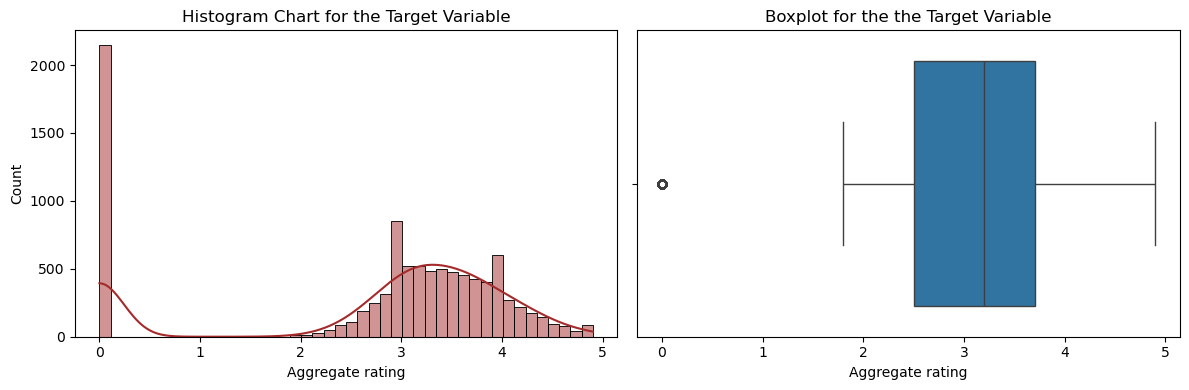

In [6]:
# Visualizing the distribution of the target Variable

plt.figure(figsize= (12,4))
plt.subplot(1,2,1)
sns.histplot(data['Aggregate rating'],kde = True,color = 'brown')
plt.title('Histogram Chart for the Target Variable')

plt.subplot(1,2,2)
sns.boxplot(x = data['Aggregate rating'],)
plt.title('Boxplot for the the Target Variable')

plt.tight_layout();

In [7]:
# Examine the distribution of the Rating text variable
data['Rating text'].value_counts()

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

```The histogram and boxplot were used to examine the distribution, spread, and presence of outliers in the target variable (Aggregate rating). Most restaurants have ratings clustered between approximately 2.5 and 4.0, while a noticeable spike at 0 indicates a large number of unrated restaurants. This is confirmed by the Rating text value counts, which show that 2,148 entries are labeled as *Not rated*. Together, these visuals and counts highlight the skewness introduced by zero ratings and link the numerical ratings to their categorical interpretation.```

## DATA WRANGLING

In [7]:
def wrangle(filepath):
    # Read the dataset
    df = pd.read_csv(filepath)

    # Drop 9 missing values
    df = df.dropna()
    
    # Drop columns with high and low cardinality
    df.drop(columns = ["Restaurant ID","Restaurant Name","Address","Switch to order menu"], inplace = True)

    # Drop leaky columns (Columns created from the target column)
    df.drop(columns = ["Rating color","Rating text"],inplace = True)

    # Drop multicolinearity columns
    df.drop(columns = ["Locality Verbose","Currency"],inplace = True)
    
    # Drop rows where aggregate rating = 0 (Not Rated)
    df = df[df['Aggregate rating'] != 0]

    return df

In [8]:
df = wrangle(r"C:\Users\GREAT\Downloads\Dataset  (1).csv")
pd.options.display.max_columns = 30
df.head(10)

Country Code              City  \
0           162       Makati City   
1           162       Makati City   
2           162  Mandaluyong City   
3           162  Mandaluyong City   
4           162  Mandaluyong City   
5           162  Mandaluyong City   
6           162        Pasay City   
7           162        Pasay City   
8           162        Pasay City   
9           162        Pasig City   

                                          Locality   Longitude   Latitude  \
0        Century City Mall, Poblacion, Makati City  121.027535  14.565443   
1       Little Tokyo, Legaspi Village, Makati City  121.014101  14.553708   
2       Edsa Shangri-La, Ortigas, Mandaluyong City  121.056831  14.581404   
3           SM Megamall, Ortigas, Mandaluyong City  121.056475  14.585318   
4           SM Megamall, Ortigas, Mandaluyong City  121.057508  14.584450   
5           SM Megamall, Ortigas, Mandaluyong City  121.056314  14.583764   
6  SM by the Bay, Mall of Asia Complex, Pasay City  120.979667  14.531333   
7  SM by the Bay, Mall of Asia Complex, Pasay City  120.979333  14.540000   
8      Sofitel Philippine Plaza Manila, Pasay City  120.980090  14.552990   
9                                        Kapitolyo  121.056532  14.572041   

                             Cuisines  Average Cost for two Has Table booking  \
0          French, Japanese, Desserts                  1100               Yes   
1                            Japanese                  1200               Yes   
2    Seafood, Asian, Filipino, Indian                  4000               Yes   
3                     Japanese, Sushi                  1500                No   
4                    Japanese, Korean                  1500               Yes   
5                             Chinese                  1000                No   
6                     Asian, European                  2000               Yes   
7  Seafood, Filipino, Asian, European                  2000               Yes   
8             European, Asian, Indian                  6000               Yes   
9                            Filipino                  1100               Yes   

  Has Online delivery Is delivering now  Price range  Aggregate rating  Votes  
0                  No                No            3               4.8    314  
1                  No                No            3               4.5    591  
2                  No                No            4               4.4    270  
3                  No                No            4               4.9    365  
4                  No                No            4               4.8    229  
5                  No                No            3               4.4    336  
6                  No                No            4               4.0    520  
7                  No                No            4               4.2    677  
8                  No                No            4               4.9    621  
9                  No                No            3               4.8    532

## EDA (Post-Cleaning)

In [9]:
print(df.shape) # Data shape after cleaning
print(df.info())

(7394, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 7394 entries, 0 to 9550
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          7394 non-null   int64  
 1   City                  7394 non-null   object 
 2   Locality              7394 non-null   object 
 3   Longitude             7394 non-null   float64
 4   Latitude              7394 non-null   float64
 5   Cuisines              7394 non-null   object 
 6   Average Cost for two  7394 non-null   int64  
 7   Has Table booking     7394 non-null   object 
 8   Has Online delivery   7394 non-null   object 
 9   Is delivering now     7394 non-null   object 
 10  Price range           7394 non-null   int64  
 11  Aggregate rating      7394 non-null   float64
 12  Votes                 7394 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 808.7+ KB
None


In [10]:
df.nunique()

Country Code              15
City                     140
Locality                1173
Longitude               6480
Latitude                6901
Cuisines                1715
Average Cost for two     140
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Price range                4
Aggregate rating          32
Votes                   1008
dtype: int64

```After cleaning, the dataset contains 7,394 rows and 13 columns, comprising 6 categorical (object) columns and 7 numerical columns.```

In [11]:
# Statistical Summary of Numerical Columns
df.describe().T

count         mean           std         min  \
Country Code          7394.0    23.034082     63.107149    1.000000   
Longitude             7394.0    63.653592     44.380399 -157.948486   
Latitude              7394.0    26.175821     11.270628  -41.330428   
Average Cost for two  7394.0  1450.157831  18314.593716    0.000000   
Price range           7394.0     1.970517      0.930536    1.000000   
Aggregate rating      7394.0     3.439505      0.552129    1.800000   
Votes                 7394.0   202.062483    479.305610    4.000000   

                             25%         50%         75%            max  
Country Code            1.000000    1.000000    1.000000     216.000000  
Longitude              77.083029   77.191952   77.272507     174.832089  
Latitude               28.475488   28.569953   28.645140      55.976980  
Average Cost for two  300.000000  500.000000  800.000000  800000.000000  
Price range             1.000000    2.000000    3.000000       4.000000  
Aggregate rating        3.000000    3.400000    3.800000       4.900000  
Votes                  19.000000   60.000000  181.000000   10934.000000

```The cleaned dataset shows that most restaurants are concentrated in Country Code 1, with longitude and latitude values clustering around 77 and 28, respectively. The average cost for two is approximately 1,450, though the distribution is highly skewed by outliers up to 800,000, with the typical range between 300 and 800. Price range mostly fall between 1 and 3, and aggregate ratings average 3.4 on a 1.8–4.9 scale. Votes are also skewed, with 75% of restaurants receiving fewer than 181 votes, while some receive over 10,000.```

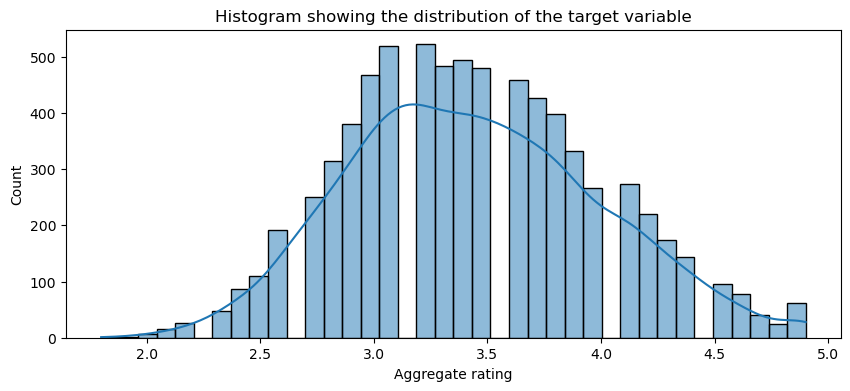

In [12]:
# Distribution of the target Variable 
plt.figure(figsize = (10,4))
sns.histplot(df['Aggregate rating'],kde=True)
plt.title('Histogram showing the distribution of the target variable');

```The histogram shows that most restaurants have aggregate ratings between 3.0 and 3.8, indicating that average to slightly above-average ratings are the most common. Very few restaurants fall below 2.5 or above 4.5, suggesting that extreme ratings are rare. Overall, the distribution is approximately bell-shaped with a peak around 3.4.```

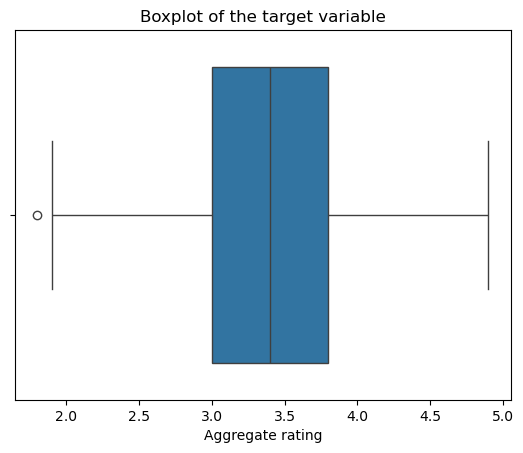

In [13]:
sns.boxplot(x = df['Aggregate rating'])
plt.title('Boxplot of the target variable');

```The boxplot shows that the median aggregate rating is around 3.4, with most restaurants having ratings between 3.0 and 3.8 (the interquartile range). The whiskers extend from about 1.8 to 4.9, indicating a wide spread of ratings. A few lower outliers exist near 2.0, but overall, most ratings cluster around the mid-to-above-average range.```

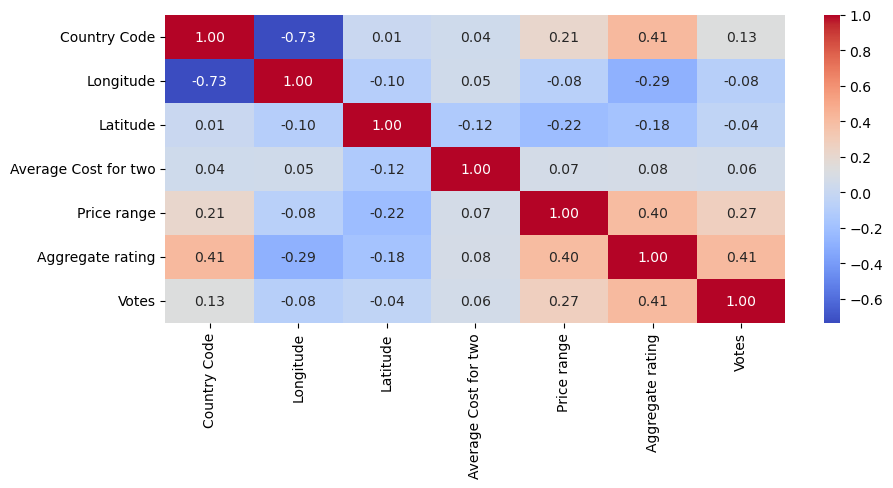

In [14]:
correlation = df.select_dtypes("number").corr()
plt.figure(figsize = (10,4))
sns.heatmap(correlation,annot=True, fmt=".2f", cmap="coolwarm", cbar=True);

```The correlation heatmap shows that Aggregate rating has a moderate positive relationship with Price range (0.40), Votes (0.41) and Country Code (0.41) suggesting that higher-priced restaurants, those in certain countries and those with more votes tend to get better ratings. Geographic features show weak negative relationships,  while average cost for two has no impact(0.8). Overall, rating patterns appear to be influenced more by Country, Price Range and Votes.```

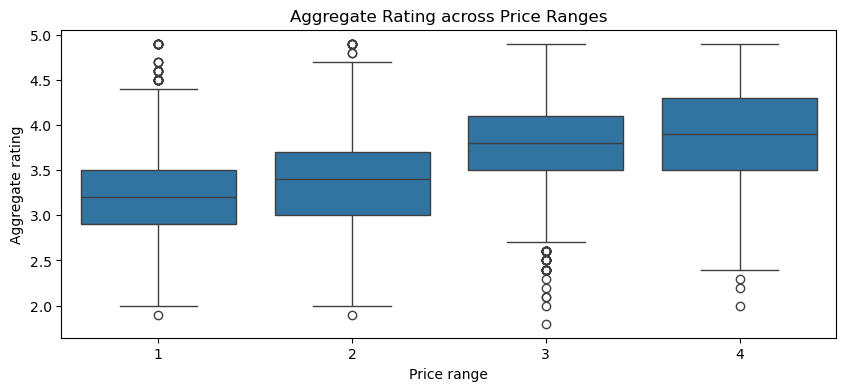

In [15]:
plt.figure(figsize = (10,4))
sns.boxplot(x="Price range", y="Aggregate rating", data=df)
plt.title("Aggregate Rating across Price Ranges");

```The boxplot above shows that higher priced restaurants generally recieve higher ratings, while cheaper restaurants have more variability  and tend to rated lower on average. AS price increases, the likelihood of higher aggregate ratings also increases ```

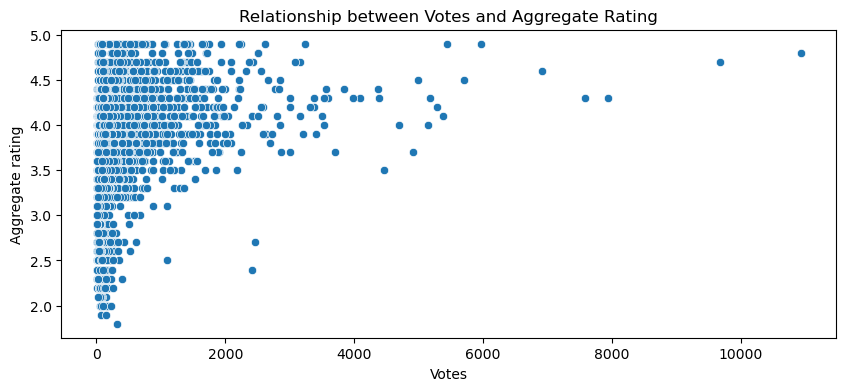

In [16]:
plt.figure(figsize = (10,4))
sns.scatterplot(x='Votes',y='Aggregate rating', data = df)
plt.title('Relationship between Votes and Aggregate Rating');

```This plot shows that restaurants with more votes tend to have consistently high ratings, while those with fewer votes show more variability (ranging from poor to excellent ratings). This suggests that ratings become more stable as the number of votes increases.```

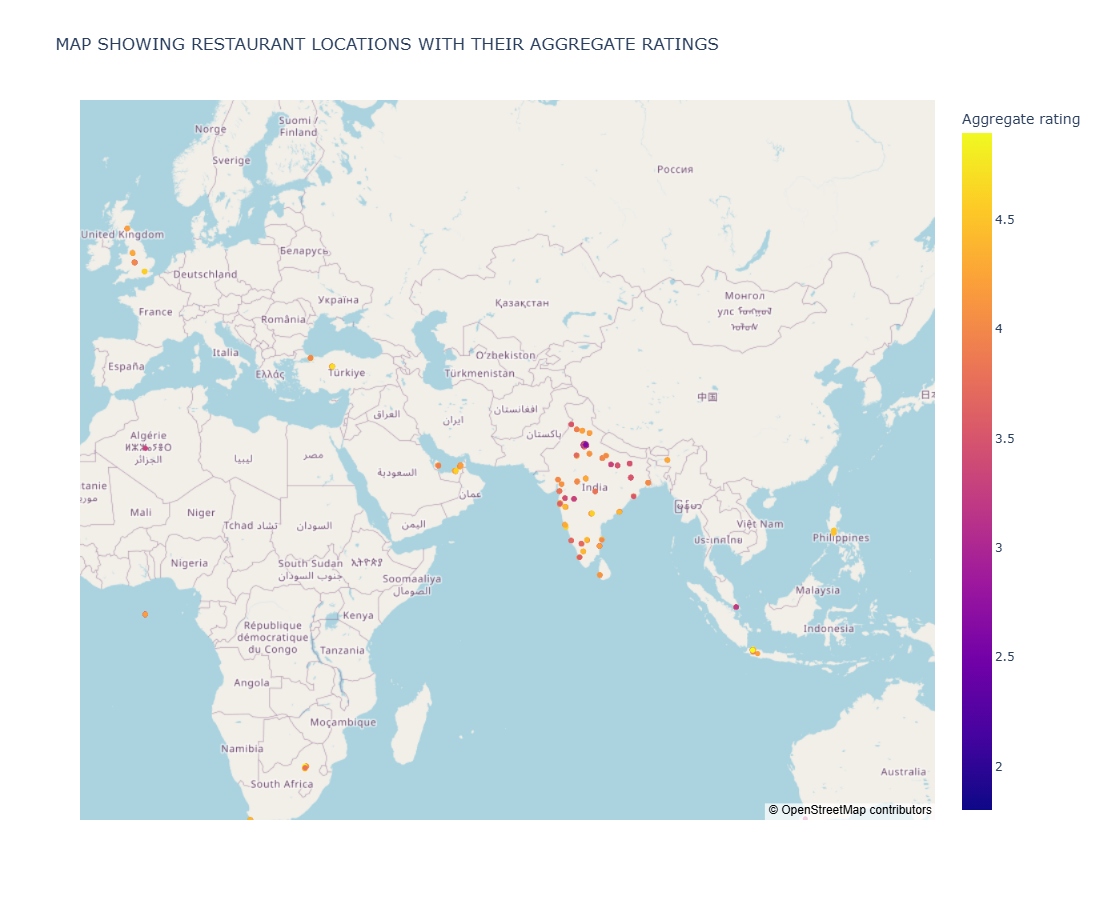

In [17]:
# Create a scatter mapbox plot
fig = px.scatter_mapbox(df, 
                        lat = "Latitude", 
                        lon = "Longitude", 
                        hover_name = "City",
                        color ="Aggregate rating", 
                        width = 1150,
                        height = 900,
                        zoom = 2,
                        title = "MAP SHOWING RESTAURANT LOCATIONS WITH THEIR AGGREGATE RATINGS",
                        mapbox_style = "open-street-map")
fig.show()

```The map shows that restaurants in India dominate the dataset, with a wide spread of aggregate ratings mostly between 3.0 and 4.5. Higher-rated restaurants (orange/yellow) appear more frequently than lower-rated ones (purple), suggesting overall good ratings in the dataset. Restaurants in other countries are fewer, but their aggregate ratings also cluster around mid-to-high values (3.0–4.5).```

In [18]:
# Top 10 cities by Average Aggregate Rating
Top5_cities = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
round(Top5_cities,1).to_frame()

Aggregate rating
City                              
Inner City                     4.9
Quezon City                    4.8
Makati City                    4.6
Pasig City                     4.6
Mandaluyong City               4.6
Beechworth                     4.6
London                         4.5
Taguig City                    4.5
Tagaytay City                  4.5
Secunderabad                   4.5

In [19]:
# Bottom 10 cities by Average Aggregate Rating
Bottom5_cities = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending = True).head(10)
Bottom5_cities.round(1).to_frame()

Aggregate rating
City                            
Montville                    2.4
Mc Millan                    2.4
Paynesville                  2.6
Mayfield                     2.9
Consort                      3.0
Ghaziabad                    3.1
Cochrane                     3.1
Faridabad                    3.1
Noida                        3.2
Winchester Bay               3.2

```The above analysis reveals substantial variation in aggregate restaurant ratings across cities, indicating that geographic location has a strong influence on customer ratings.```

In [20]:
# Average Aggregate Rating by 'table booking'
df.groupby('Has Table booking')['Aggregate rating'].mean()

Has Table booking
No     3.413322
Yes    3.587579
Name: Aggregate rating, dtype: float64

In [21]:
# Average Aggregate Rating by 'online delivery'
df.groupby('Has Online delivery')['Aggregate rating'].mean()

Has Online delivery
No     3.466720
Yes    3.381274
Name: Aggregate rating, dtype: float64

In [22]:
#Average Aggregate Rating by 'delivering now'
df.groupby('Is delivering now')['Aggregate rating'].mean()

Is delivering now
No     3.440361
Yes    3.248485
Name: Aggregate rating, dtype: float64

```Overall, table booking availability, online delivery options, and delivering now services show minimal influence on the aggregate ratings of restaurants, as the observed differences in mean ratings are relatively small.```

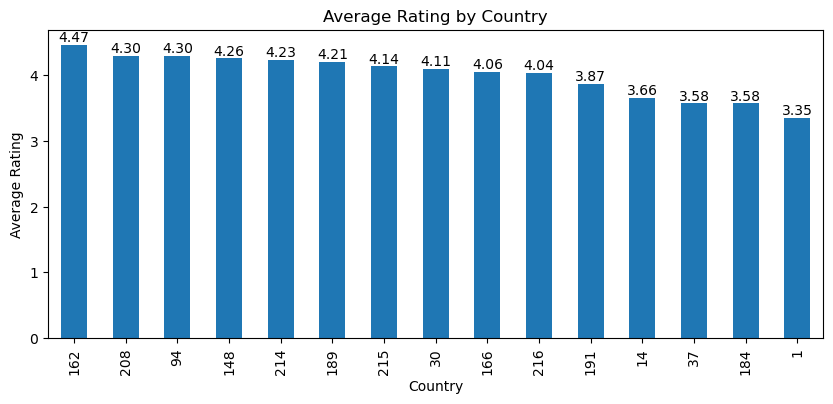

In [23]:
# Rating by Country
plt.figure(figsize = (10,4))
plot = df.groupby('Country Code')['Aggregate rating'].mean().sort_values(ascending = False).plot(
    kind = 'bar',
    title = 'Average Rating by Country',
    xlabel = 'Country',
    ylabel = 'Average Rating')
for bars in plot.containers:
  plot.bar_label(bars,  fmt='%.2f')

In [24]:
top5_cities = df['City'].value_counts().head()
top5_cities

City
New Delhi    4048
Gurgaon       890
Noida         696
Faridabad     151
Ghaziabad      23
Name: count, dtype: int64

## SPLIT DATASET

In [25]:
target = "Aggregate rating"

X = df.drop(target, axis = 1)
y = df[target]

```Train-Test Split for models```

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5915, 12), (1479, 12), (5915,), (1479,))

``` Train-Validation Split for tree based models```

In [34]:
X_train_val, X_val,y_train_val,y_val = train_test_split(X_train,y_train,test_size = 0.2,random_state = 42)
X_train_val.shape, X_val.shape, y_train_val.shape, y_val.shape

((4732, 12), (1183, 12), (4732,), (1183,))

## BUILD MODEL

In [36]:
# Baseline metrics
y_pred_baseline = [y_train.mean()] * len(y_train)
metrics.mean_absolute_error(y_train,y_pred_baseline)

0.44840917792137

#### LINEAR REGRESSION MODEL

In [37]:
LR_model = make_pipeline(
    OneHotEncoder(),
    StandardScaler(),
    LinearRegression()
)
LR_model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['City', 'Locality', 'Cuisines',
                                     'Has Table booking', 'Has Online delivery',
                                     'Is delivering now'])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

#### DECISION TREE REGRESSOR MODEL

In [39]:
DT_model = make_pipeline(
    OneHotEncoder(),
    StandardScaler(),
    DecisionTreeRegressor(random_state = 42) 
)
DT_model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['City', 'Locality', 'Cuisines',
                                     'Has Table booking', 'Has Online delivery',
                                     'Is delivering now'])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

### EVALUATE MODELS

In [38]:
# Linear Regression Model
LR_ypred = LR_model.predict(X_test)
r2_score = metrics.r2_score(y_test,LR_ypred)
mse = metrics.mean_squared_error(y_test,LR_ypred)
rmse = metrics.root_mean_squared_error(y_test,LR_ypred)
print(f"The r2 score of the Linear Regression model is:",round(r2_score,2))
print(f"The mse of the Linear Regression model is:", round(mse,2))
print(f"The root mean squared error of the Linear Regression model is:",round(rmse,2))

The r2 score of the Linear Regression model is: 0.42
The mse of the Linear Regression model is: 0.18
The root mean squared error of the Linear Regression model is: 0.42


In [40]:
# Decision Tree Regressor
DT_ypred = DT_model.predict(X_test)
r2_score = metrics.r2_score(y_test,DT_ypred)
mse = metrics.mean_squared_error(y_test,DT_ypred)
rmse = metrics.root_mean_squared_error(y_test,DT_ypred)
print(f"The r2 score of the Decision tree Regressor model is:",round(r2_score,2))
print(f"The mse of the Decision tree Regressor model is:", round(mse,2))
print(f"The root mean squared error of the Decision Tree Regressor model is:",round(rmse,2))

The r2 score of the Decision tree Regressor model is: 0.33
The mse of the Decision tree Regressor model is: 0.21
The root mean squared error of the Decision Tree Regressor model is: 0.46


### HYPERPARAMETER TUNING FOR DECISION TREE REGRESSOR

In [41]:
# Use the get_depth method on the DecisionTreeClassifier to see how deep the tree grew during training.
tree_depth = DT_model.named_steps['decisiontreeregressor'].get_depth()
print("Tree Depth:", tree_depth)
# range of possible values for max_depth hyperparameter
depth_hyperparams = range(1,57,2)
depth_hyperparams

Tree Depth: 56


range(1, 57, 2)

In [44]:
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    
    test_model = make_pipeline(
    OneHotEncoder(),
    DecisionTreeRegressor(max_depth = d,random_state = 42)
)
    # Fit model to training data 
    test_model.fit(X_train_val, y_train_val)
    
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train_val,y_train_val))
    
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_val,y_val))

print("Training Accuracy Scores:", training_acc[:10])
print("Validation Accuracy Scores:", validation_acc[:10])

Training Accuracy Scores: [0.32739023913621335, 0.4867421829185651, 0.5553807160757815, 0.6116805155966288, 0.6623462210168346, 0.7164195154512573, 0.7594828263028381, 0.7957980049419204, 0.8361483819007534, 0.8708176868705013]
Validation Accuracy Scores: [0.31364881139548384, 0.48511617471489943, 0.5505596765259315, 0.5513792642764477, 0.5385858713952845, 0.5323191411484464, 0.4960216951647427, 0.48534447325834695, 0.4610009070762323, 0.4531470913473712]


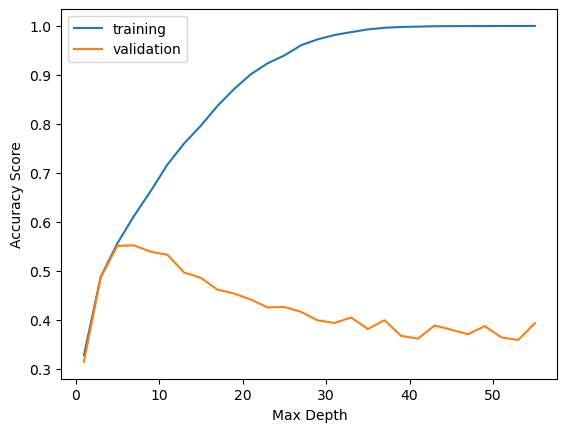

In [45]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams,training_acc,label = 'training')
plt.plot(depth_hyperparams,validation_acc,label = 'validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend();

In [46]:
DT_model = make_pipeline(
    OneHotEncoder(),
    StandardScaler(),
    DecisionTreeRegressor(max_depth = 6,random_state = 42) 
)
DT_model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['City', 'Locality', 'Cuisines',
                                     'Has Table booking', 'Has Online delivery',
                                     'Is delivering now'])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=6, random_state=42))])

In [49]:
# Decision Tree Regressor
DT_ypred = DT_model.predict(X_test)
r2_score = metrics.r2_score(y_test,DT_ypred)
mse = metrics.mean_squared_error(y_test,DT_ypred)
rmse = metrics.root_mean_squared_error(y_test,DT_ypred)
print(f"The r2 score of the Decision tree Regressor model is:",round(r2_score,2))
print(f"The mse of the Decision tree Regressor model is:", round(mse,2))
print(f"The root mean squared error of the Decision Tree Regressor model is:",round(rmse,2))

The r2 score of the Decision tree Regressor model is: 0.54
The mse of the Decision tree Regressor model is: 0.14
The root mean squared error of the Decision Tree Regressor model is: 0.38


In [50]:
# Get feature names and importance
features = DT_model.named_steps['onehotencoder'].get_feature_names_out(X_train.columns)
importances = DT_model.named_steps['decisiontreeregressor'].feature_importances_

feat_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feat_importance_df.head())

                   Feature  Importance
2642                 Votes    0.728272
1184             Longitude    0.132636
0             Country Code    0.046193
1185              Latitude    0.039062
2634  Average Cost for two    0.024225


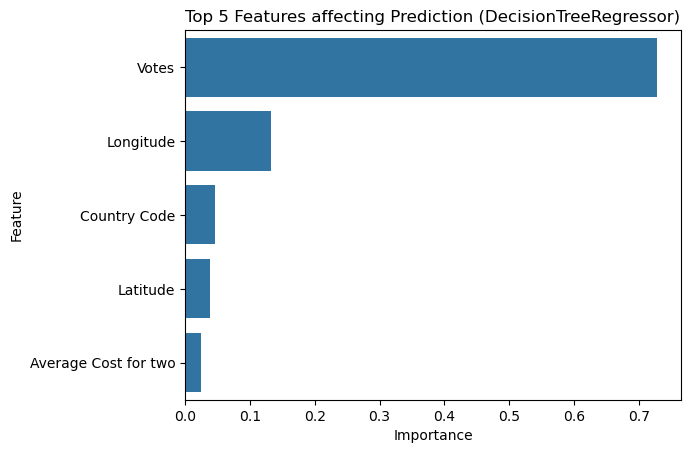

In [51]:
sns.barplot(data = feat_importance_df.head(5), x = 'Importance', y = 'Feature')
plt.title('Top 5 Features affecting Prediction (DecisionTreeRegressor)');

### RANDOM FOREST REGRESSOR

In [52]:
RF_model = make_pipeline(
    OneHotEncoder(),
    RandomForestRegressor(random_state = 42) 
)
RF_model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['City', 'Locality', 'Cuisines',
                                     'Has Table booking', 'Has Online delivery',
                                     'Is delivering now'])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [53]:
RF_ypred = RF_model.predict(X_test)
RF_ypred = RF_model.predict(X_test)
r2_score = metrics.r2_score(y_test,RF_ypred)
mse = metrics.mean_squared_error(y_test,RF_ypred)
rmse = metrics.root_mean_squared_error(y_test,RF_ypred)
print(f"The r2 score of the Random Forest Regressor model is:",round(r2_score,2))
print(f"The mse of the Random Forest Regressor model is:", round(mse,2))
print(f"The root mean squared error of the Random Forest Regressor model is:",round(rmse,2))

The r2 score of the Random Forest Regressor model is: 0.6
The mse of the Random Forest Regressor model is: 0.12
The root mean squared error of the Random Forest Regressor model is: 0.35


In [54]:
# Get feature names
features = RF_model.named_steps['onehotencoder'].get_feature_names_out()
importances =RF_model.named_steps['randomforestregressor'].feature_importances_
feat_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feat_importance_df.head())

                   Feature  Importance
2642                 Votes    0.469284
1184             Longitude    0.100918
1185              Latitude    0.086592
2634  Average Cost for two    0.044794
0             Country Code    0.041442


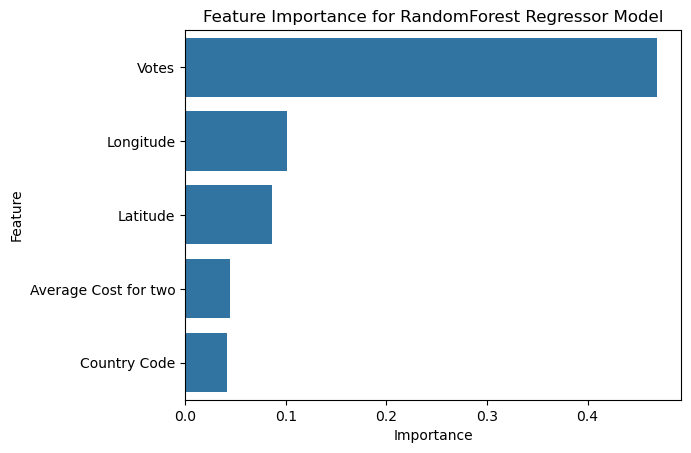

In [55]:
sns.barplot(data = feat_importance_df.head(5), x = 'Importance', y = 'Feature')
plt.title('Feature Importance for RandomForest Regressor Model');

```From the evaluated models, the Random Forest Regressor achieved the best performance, explaining 60% of the variance in aggregate ratings and yielding the lowest RMSE. Hyperparameter tuning substantially improved the Decision Tree model, highlighting the importance of validation and complexity control in tree-based models. ```